<a href="https://colab.research.google.com/github/leon-lee-hub833/Tourism_Data_Projects/blob/main/Thailand_Domestic_Tourism_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yanglee230929","key":"f16380571f8cf8253406211ac5d8f88a"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d thaweewatboy/thailand-domestic-tourism-statistics

Dataset URL: https://www.kaggle.com/datasets/thaweewatboy/thailand-domestic-tourism-statistics
License(s): Attribution 4.0 International (CC BY 4.0)


In [6]:
!unzip thailand-domestic-tourism-statistics.zip

Archive:  thailand-domestic-tourism-statistics.zip
  inflating: thailand_domestic_tourism_2019_2023.csv  
  inflating: thailand_domestic_tourism_2019_2023.parquet  
  inflating: thailand_domestic_tourism_2019_2023_ver2.csv  
  inflating: thailand_domestic_tourism_2019_2023_ver2.parquet  


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("thailand_domestic_tourism_2019_2023.csv")
df.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30800 entries, 0 to 30799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30800 non-null  object 
 1   province_thai  30800 non-null  object 
 2   province_eng   30800 non-null  object 
 3   region_thai    30800 non-null  object 
 4   region_eng     30800 non-null  object 
 5   variable       30800 non-null  object 
 6   value          30800 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [22]:
df['variable'].unique()

array(['occupancy_rate', 'no_tourist_occupied', 'no_tourist_all',
       'no_tourist_thai', 'no_tourist_foreign', 'net_profit_all',
       'net_profit_thai', 'net_profit_foreign'], dtype=object)

In [10]:
df.groupby('date')['variable'].nunique().sort_values()

,variable
date,
2019-01-01,8
2019-02-01,8
2019-03-01,8
2019-04-01,8
2019-05-01,8
2019-06-01,8
2019-07-01,8
2019-08-01,8
2019-09-01,8


In [17]:
df['province_eng'].nunique()

77

date: the **month and year** in which the statistics were recorded. the dataset

covers the year 2019-2023

province_thai: the name of the privince in Thailand, in Thai language

province_eng: the name of province in Thailand in english， **total 77 provinces**

region_Thai: The name of the region in Thailand to which the province belongs, in Thai

region_english: The name of the region in Thailand to which the province belongs, in english, **total 5 regions**

variable: the 8 type of data being recored

['occupancy_rate',

'no_tourist_occupied',

'no_tourist_all', total number of tourist


'no_tourist_thai', total number of thai tourist

'no_tourist_foreign', total number of foreign tourist

'net_profit_all', total revenue

'net_profit_thai', total revenue from thai tourist

'net_profit_foreign' total revenue from foreign tourist]



Value: the Value of the data being recorded

Analysis overview

1.Analyze the overall tourism trends in Thailand from 2019 to 2023

2.Identify which provinces attract the highest number of tourists accross the country

3.Determine which regions are more appealing to foreign tourists and which rely primarily on domestic tourism.

4.Explore whether there is a correlation between occupancy rate, the number of tourists, and tourism revenue.




## Analyze the overall tourism trends in Thailand from 2019 to 2023

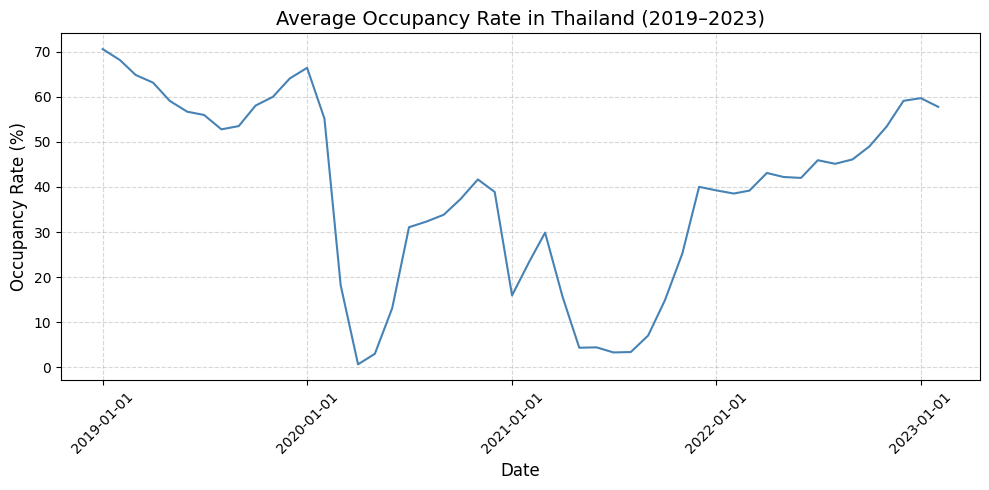

In [34]:

df_occ = df[df['variable'] == 'occupancy_rate']
df_occ_grouped = df_occ.groupby('date')['value'].mean()


df_occ_grouped.index = pd.to_datetime(df_occ_grouped.index)


plt.figure(figsize=(10, 5))
plt.plot(df_occ_grouped, color='steelblue')


plt.title('Average Occupancy Rate in Thailand (2019–2023)', fontsize=14)
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.xlabel('Date', fontsize=12)

plt.xticks(pd.date_range(start='2019-01-01', end='2023-12-01', freq='YS'), rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Identify which provinces attract the highest number of tourists accross the country

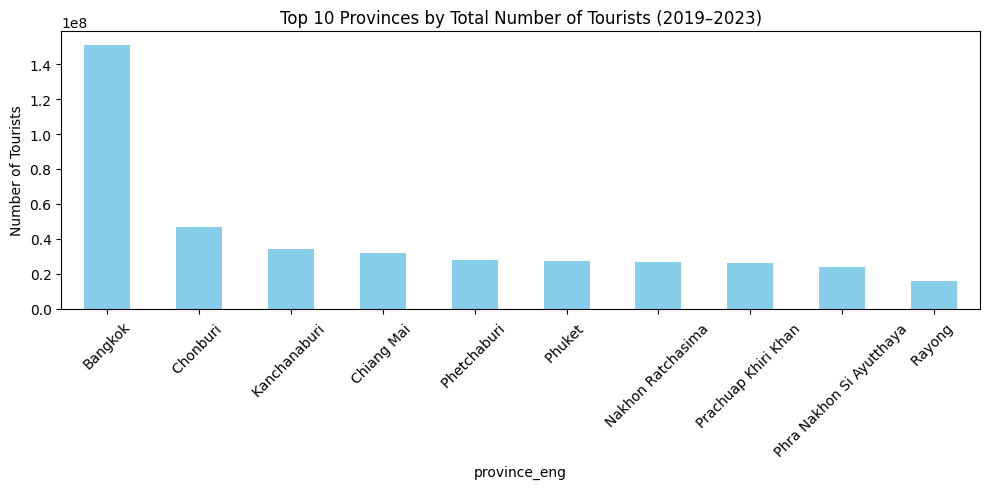

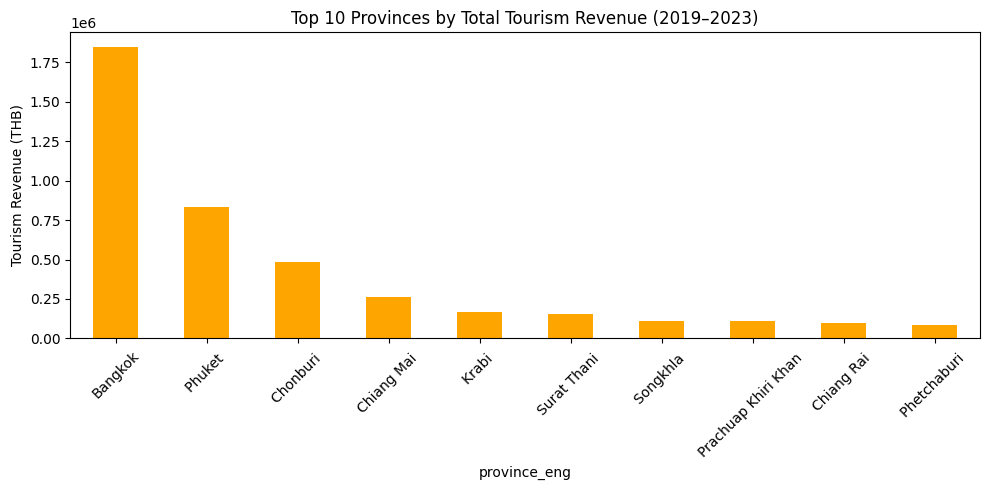

In [35]:

df_tourist = df[df['variable'] == 'no_tourist_all']


top_tourist = df_tourist.groupby('province_eng')['value'].sum().sort_values(ascending=False).head(10)

df_revenue = df[df['variable'] == 'net_profit_all']

top_revenue = df_revenue.groupby('province_eng')['value'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
top_tourist.plot(kind='bar', color='skyblue')
plt.title('Top 10 Provinces by Total Number of Tourists (2019–2023)')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
top_revenue.plot(kind='bar', color='orange')
plt.title('Top 10 Provinces by Total Tourism Revenue (2019–2023)')
plt.ylabel('Tourism Revenue (THB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Determine which regions are more appealing to foreign tourists and which rely primarily on domestic tourism.

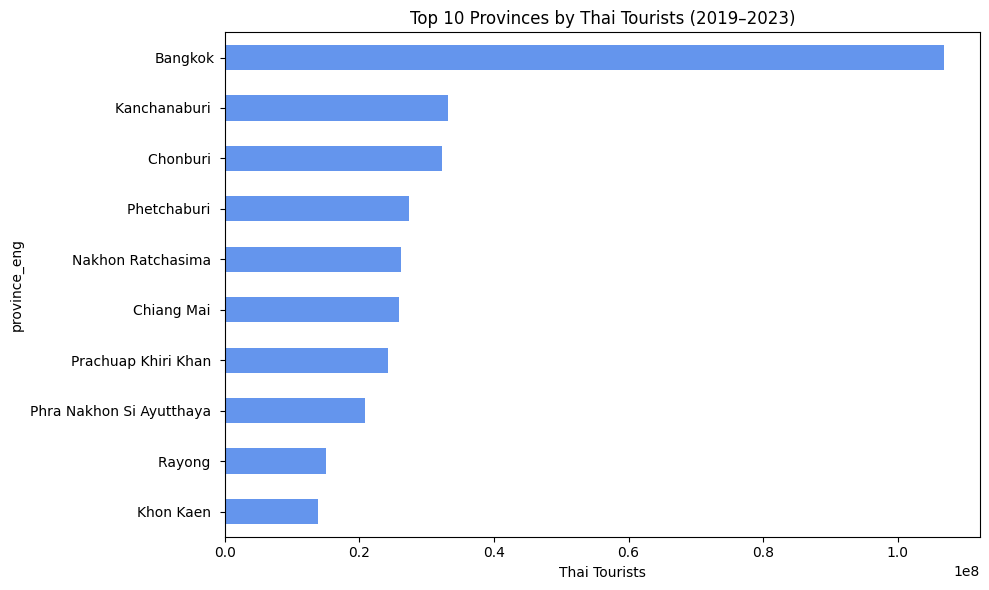

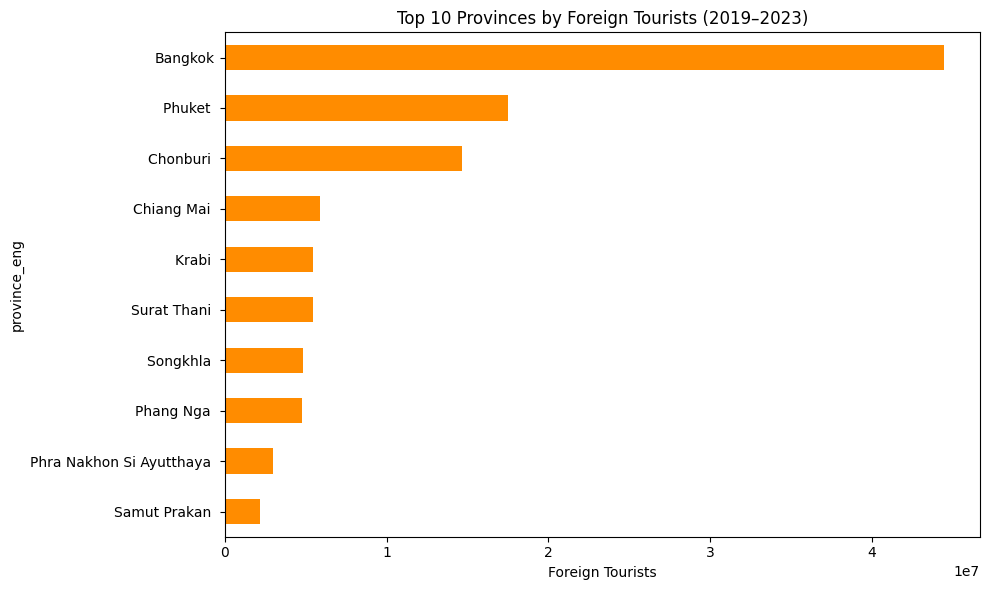

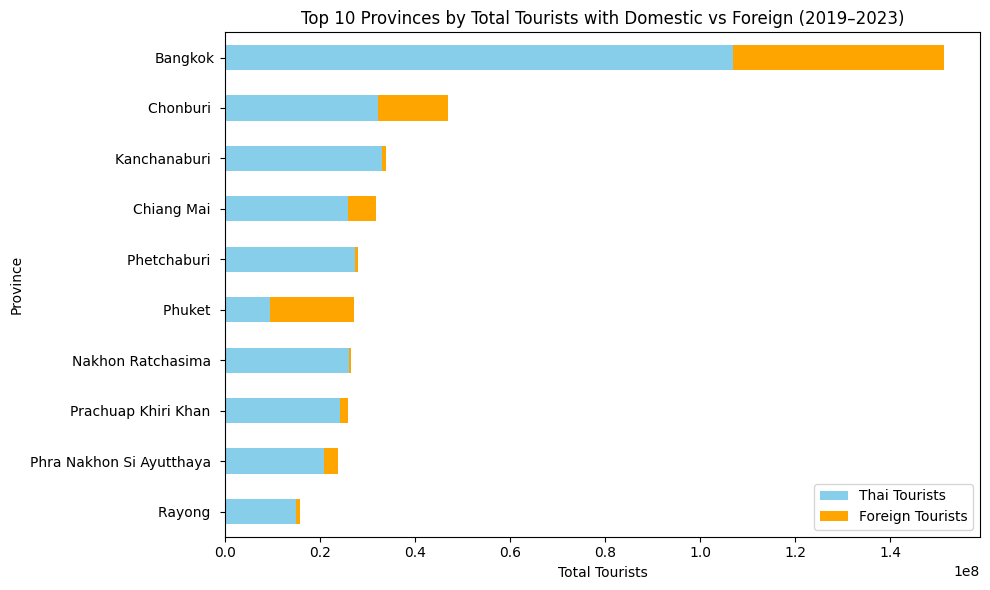

In [36]:

df['variable'] = df['variable'].str.strip()


df_domestic = df[df['variable'] == 'no_tourist_thai']
df_foreign = df[df['variable'] == 'no_tourist_foreign']


domestic_total = df_domestic.groupby('province_eng')['value'].sum()
foreign_total = df_foreign.groupby('province_eng')['value'].sum()


df_compare = pd.DataFrame({
    'Thai Tourists': domestic_total,
    'Foreign Tourists': foreign_total
}).dropna()


df_compare['Total Tourists'] = df_compare['Thai Tourists'] + df_compare['Foreign Tourists']

# -------------------------------
top_thai = df_compare.sort_values('Thai Tourists', ascending=False).head(10)
plt.figure(figsize=(10,6))
top_thai['Thai Tourists'].plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Provinces by Thai Tourists (2019–2023)')
plt.xlabel('Thai Tourists')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -------------------------------
top_foreign = df_compare.sort_values('Foreign Tourists', ascending=False).head(10)
plt.figure(figsize=(10,6))
top_foreign['Foreign Tourists'].plot(kind='barh', color='darkorange')
plt.title('Top 10 Provinces by Foreign Tourists (2019–2023)')
plt.xlabel('Foreign Tourists')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
# -------------------------------
top_total = df_compare.sort_values('Total Tourists', ascending=False).head(10)
top_total[['Thai Tourists', 'Foreign Tourists']].plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange']
)

plt.title('Top 10 Provinces by Total Tourists with Domestic vs Foreign (2019–2023)')
plt.xlabel('Total Tourists')
plt.ylabel('Province')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Explore whether there is a correlation between occupancy rate, the number of tourists, and tourism revenue.

In [37]:
target_vars = ['occupancy_rate', 'no_tourist_all', 'net_profit_all']
df_filtered = df[df['variable'].isin(target_vars)]

df_wide = df_filtered.pivot_table(
    index=['date', 'province_eng'],
    columns='variable',
    values='value'
).reset_index()


df_wide = df_wide.dropna()

correlation_matrix = df_wide[['occupancy_rate', 'no_tourist_all', 'net_profit_all']].corr()
print(correlation_matrix)

variable        occupancy_rate  no_tourist_all  net_profit_all
variable                                                      
occupancy_rate        1.000000        0.353088        0.240981
no_tourist_all        0.353088        1.000000        0.890881
net_profit_all        0.240981        0.890881        1.000000


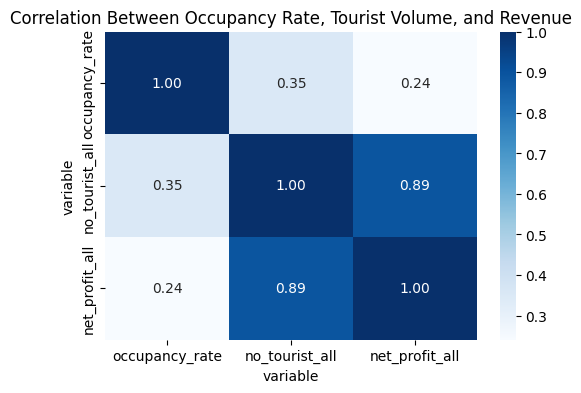

In [38]:

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Occupancy Rate, Tourist Volume, and Revenue')
plt.show()


## Summary
1: The line chart illustrates the significant impact of Covid-19(during 2020-2022) on the tourism industry and the gradual revival as travel restrictions where lifted(2022-2023)

2.from chart we can understand that Bnagkok ranks first both total number of tourists and total tourism revenue. for tourist volume, it is followed by Chonburi(Pattaya),Kanchanaburi and Changmai.For tourism revenue, the top followers are Phuket, Chonburi(Pattaya), and ChangMai

This suggests that in maior tourist cities like Phuket, Pattaya, ChangMai, hotels revenue are likely higher than provinces like Kanchanaburi and phetchaburi

3.Major cities like Bangkok and Chiang Mai attract domestic and international tourists
Phuket and Krabi are especially popular among foreign visitors. Kanchanaburi and Phetchaburi rely heavily on Thai tourists

4.The number of tourists is a storong predictor of tourism revenue, occupancy rate alone is not a reliable indicator if financial performance( perhaps many tourists only book day trips without staying overnight) so policy-makers should focus more on increasing tourist volume and enhanceing per-isitor spending